### Домашняя работа

In [3]:

import numpy as np
import matplotlib.pyplot as plt

MPa = 1e6
kW = 1e3
MW = 1e6
mm = 1e-3

m = 8
t = 25 * mm

beta = 75
density = 8000
E = 2 * (10**11)
z = 84
d = 1.25
l = 0.15
f = 19.44 * (10 ** (-4)) #Площадь сечения лопатки
J = 1.43 * (10 ** (-8))
#Размер бандажной ленты
delta = 5 * mm
B = 60 * mm 

i = (J / f) ** 0.5

_lambda = l / i
_lambda

55.30588810191244

In [4]:
psi = 0.98

In [5]:
def static_frequency(i):
    _m = {
        1: 0.56,
        2: 3.51,
        3: 9.82
 
    }
    first = psi * _m[i] / (l ** 2)
    second = ((E * J) / (density * f)) ** 0.5
    return first * second  

In [7]:
H = 0.12
J_b = B * (delta ** 3) / 12

k = (12 * (m - 1) * H * E * J_b * l * np.sin(np.deg2rad(beta)) ** 2) / (m * t * J * E)

nu = B * delta * t / (f * l)

f_a0 = static_frequency(1) * 0.8
f_a1 = static_frequency(1) * 6
f_b0 = static_frequency(1) * 4.2

f_a0, f_a1, f_b0  # Hz
B_bandage = 0.5 * ((d/l) - 1) * ((nu+1/2)/(nu+1/3)) + np.sin(np.deg2rad(beta)) ** 2

def to_dynamic_frequency(f, n=50):
    root = (1 + B_bandage * (n / f) ** 2) ** 0.5
    return f * root
B_bandage

6.301685099217912

In [8]:
to_dynamic_frequency(f_a0), to_dynamic_frequency(f_a1), to_dynamic_frequency(f_b0)

(292.8725752291112, 1988.5639718136847, 1394.8778142902904)

In [9]:
def min_max(f, delta=0.05):
    return f * (1-delta) , f * (1 + delta)
 
n_line = np.linspace(0, 60)
min_line, max_line = min_max(to_dynamic_frequency(f_a0, n=n_line))
min_line1, max_line1 = min_max(to_dynamic_frequency(f_a1, n=n_line))
min_line2, max_line2 = min_max(to_dynamic_frequency(f_b0, n=n_line))

def k_line(k, n=n_line):
    return k * n_line

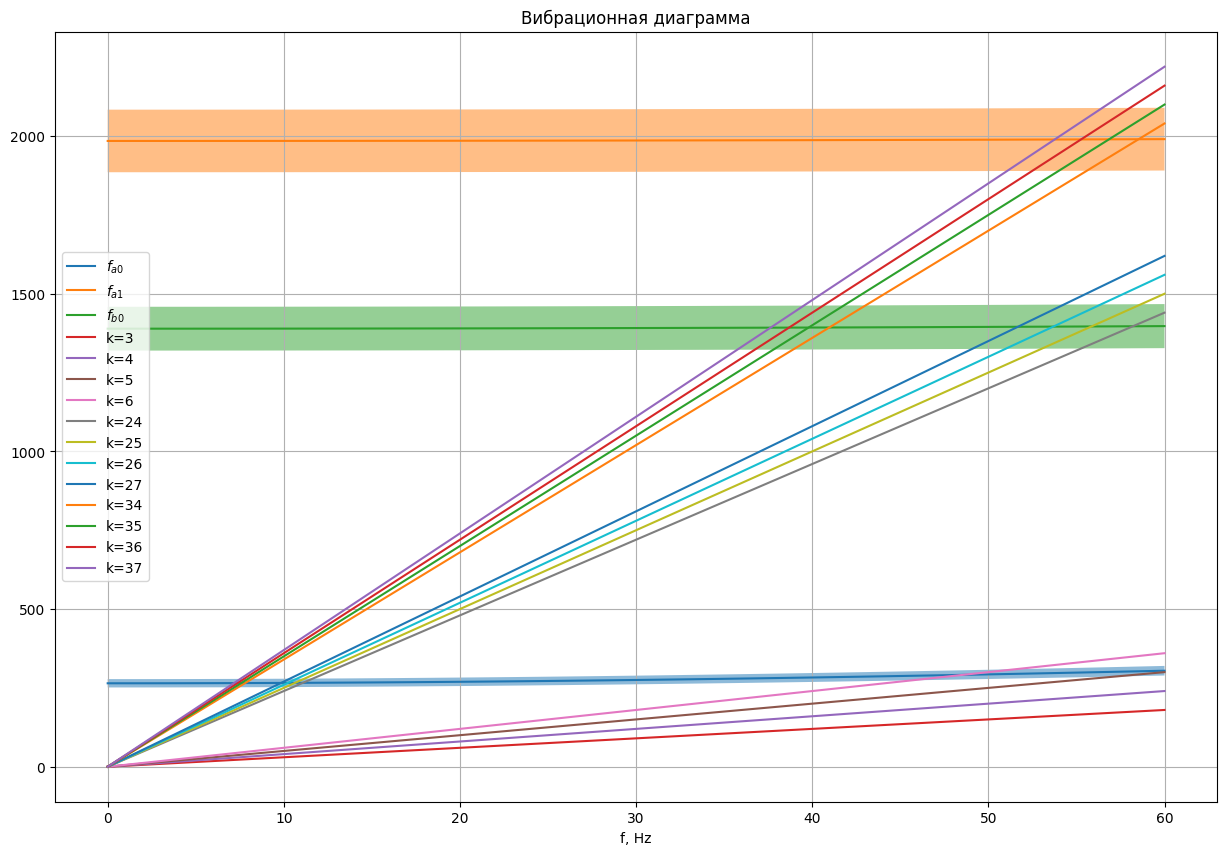

In [10]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.plot(n_line, to_dynamic_frequency(f_a0, n=n_line), label='$f_{a0}$')
ax.fill_between(n_line, y1=min_line, y2=max_line, alpha=0.5)
ax.plot(n_line, to_dynamic_frequency(f_a1, n=n_line), label='$f_{a1}$')
ax.fill_between(n_line, y1=min_line1, y2=max_line1, alpha=0.5)
ax.plot(n_line, to_dynamic_frequency(f_b0, n=n_line), label='$f_{b0}$')
ax.fill_between(n_line, y1=min_line2, y2=max_line2, alpha=0.5)

for i in range(3,7):
      ax.plot(n_line, k_line(i), label=f'k={i}')
        
for i in range(24,28):
      ax.plot(n_line, k_line(i), label=f'k={i}')
        
for i in range(34,38):
      ax.plot(n_line, k_line(i), label=f'k={i}')        
        
ax.set_xlabel("n, rps")
ax.set_xlabel("f, Hz")
ax.grid()
ax.legend()
ax.set_title("Вибрационная диаграмма");

Для определения опасных зон работы лопаточного аппарата используется вибрационная диаграмма, на которой изображены кривые, показывающие зависимость динамических частот колебаний лопаток от частоты вращения ротора турбины. Также на диаграмме присутствуют прямые линии, которые показывают зависимости возмущающих сил различной кратности. Рабочие лопатки не могут попасть в резонанс первой кратности, но каждая лопатка имеет бесконечно большое число резонансов, соответствующих разным кратностям возмущающих сил. На диаграмме также присутствуют графики зависимости собственной динамической частоты от частоты вращения колеса для каждой лопатки или пакета, закрепленных на колесе. Разница частот в области между верхней и нижней кривыми определяет разброс, обусловленный разными частотными характеристиками лопаток или пакетов.